In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

In [24]:
stock = pd.read_csv("data_for_assignment2.csv", parse_dates=True)

In [25]:
stock.head(5)

,Date,S,nom_return,real_return,log_return,FED,delta_fed,IP
0,31-Jan-80,1.61,0.00,0.00,0.00,13.82,0.00,51.7
1,29-Feb-80,1.52,-0.06,-0.06,-0.03,14.13,0.31,51.5
2,31-Mar-80,1.42,-0.06,-0.06,-0.03,17.19,3.06,50.5
3,30-Apr-80,1.51,0.06,0.06,0.03,17.61,0.42,49.2
4,30-May-80,1.63,0.08,0.08,0.03,10.98,-6.63,48.6


In [26]:
stock.S.describe()

count    360.000000
mean      27.340694
std       24.137856
min        1.420000
25%        4.945000
50%       13.730000
75%       52.462500
max       70.880000
Name: S, dtype: float64

In [27]:
stock.FED.describe()

count    360.000000
mean       6.021806
std        3.788643
min        0.120000
25%        3.330000
50%        5.495000
75%        8.132500
max       19.100000
Name: FED, dtype: float64

In [28]:
stock['LogS'] = np.log(stock['S'])
stock.head()

,Date,S,nom_return,real_return,log_return,FED,delta_fed,IP,LogS
0,31-Jan-80,1.61,0.00,0.00,0.00,13.82,0.00,51.7,0.476234
1,29-Feb-80,1.52,-0.06,-0.06,-0.03,14.13,0.31,51.5,0.418710
2,31-Mar-80,1.42,-0.06,-0.06,-0.03,17.19,3.06,50.5,0.350657
3,30-Apr-80,1.51,0.06,0.06,0.03,17.61,0.42,49.2,0.412110
4,30-May-80,1.63,0.08,0.08,0.03,10.98,-6.63,48.6,0.488580


In [34]:
#stock.set_index("Date",inplace=True)

KeyError: 'Date'

In [5]:
# Fit regression model (Level-Level)
results10 = smf.ols('S ~ delta_fed', data=stock).fit()

# Inspect the results
print(results10.summary())


                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.007155
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.933
Time:                        10:43:51   Log-Likelihood:                -1656.5
No. Observations:                 360   AIC:                             3317.
Df Residuals:                     358   BIC:                             3325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3472      1.276     21.428      0.0

In [161]:
# Fit regression model (Level-Level)
results = smf.ols('S ~ FED', data=stock).fit()

# Inspect the results
print(results.summary())
np.lo

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     310.5
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.76e-50
Time:                        16:10:50   Log-Likelihood:                -1544.1
No. Observations:                 360   AIC:                             3092.
Df Residuals:                     358   BIC:                             3100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4870      1.752     30.521      0.0

In [198]:
# Fit regression model (using the natural log of one of the regressors: lEVEL-LOG)
results = smf.ols('S ~ np.log(FED)', data=stock).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     255.4
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           9.06e-44
Time:                        16:48:11   Log-Likelihood:                -1559.6
No. Observations:                 360   AIC:                             3123.
Df Residuals:                     358   BIC:                             3131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      52.7785      1.866     28.287      

In [197]:
# NOTE TO SELF, this is the best regression R^2 and p-value  wise
# SEE REGRESSION PLOT BELOW FOR LINEAR-ISH RELATIONSHIP
# Fit regression model (using the natural log of dependent variable)
results2 = smf.ols('np.log(S) ~ FED', data=stock).fit()

# Inspect the results
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:              np.log(S)   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     620.0
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           3.98e-80
Time:                        16:48:09   Log-Likelihood:                -413.91
No. Observations:                 360   AIC:                             831.8
Df Residuals:                     358   BIC:                             839.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2879      0.076     56.494      0.0

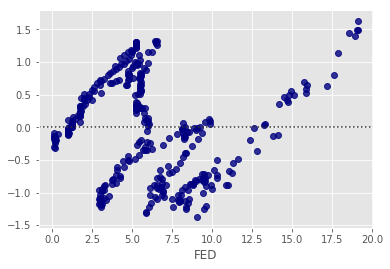

In [283]:
#Shows possibility of heteroskedacity and likely autocorrelation based on the durbin-watson test
sns.residplot(FED, LogS, data=stock,color='Navy',label="Residuals Plot")

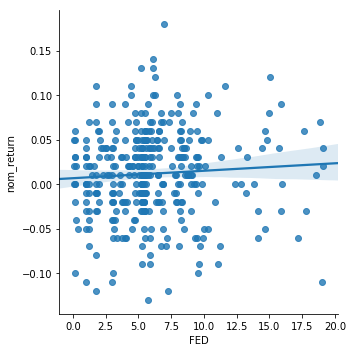

In [42]:
# model respecified as % change in the stock price, a lot of dispersion
sns.lmplot(y="nom_return", x="FED", data=stock);

In [44]:
# % change in return vs FED, low R-squared, model not statistically significant overall (based on F-statistic)
# Fit regression model (% )
results11 = smf.ols('nom_return ~ FED', data=stock).fit()

# Inspect the results
print(results11.summary())

                            OLS Regression Results                            
Dep. Variable:             nom_return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.517
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.219
Time:                        13:08:46   Log-Likelihood:                 577.43
No. Observations:                 360   AIC:                            -1151.
Df Residuals:                     358   BIC:                            -1143.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0066      0.005      1.371      0.1

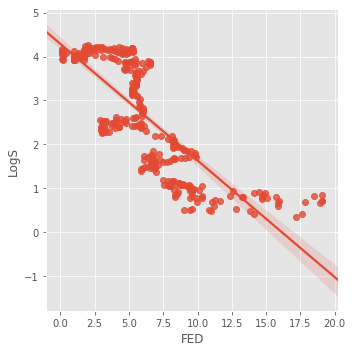

In [285]:
sns.lmplot(y="LogS", x="FED", data=stock);

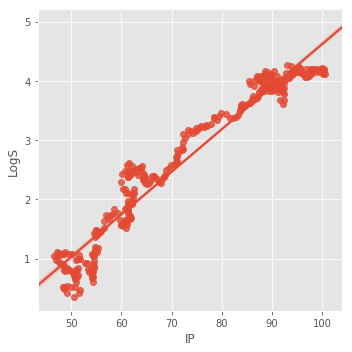

In [288]:
sns.lmplot(y="LogS", x="IP", data=stock,palette='pastel')

In [199]:
# REGRESSION MODEL ESTIMATED WITH THE IP INDEX TOO FOR QUESTION 3 (LOG-LEVEL)
# All values significant ***, high R^2 
# Fit regression model (using the natural log of dependent variable)
results3 = smf.ols('np.log(S) ~ FED + IP', data=stock).fit()

# Inspect the results
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(S)   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     5147.
Date:                Thu, 08 Nov 2018   Prob (F-statistic):          5.71e-264
Time:                        16:49:09   Log-Likelihood:                 16.437
No. Observations:                 360   AIC:                            -26.87
Df Residuals:                     357   BIC:                            -15.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2945      0.097    -13.404      0.0

In [270]:
# WALD TEST FOR WHETHER B2 = B3 = 0
hypotheses = '(FED = IP = 0)'
f_test = results3.f_test(hypotheses)
print(f_test)


<F test: F=array([[5147.35497584]]), p=5.713810260318612e-264, df_denom=357, df_num=2>


In [37]:
# REGRESSION MODEL ESTIMATED WITH THE IP INDEX TOO FOR QUESTION 3 (lEVEL-lEVEL)
# All values significant ***, high R^2 
# Fit regression model (using the natural log of dependent variable)
results6 = smf.ols('S ~ FED + IP', data=stock).fit()

# Inspect the results
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     2520.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):          2.93e-211
Time:                        12:23:08   Log-Likelihood:                -1167.6
No. Observations:                 360   AIC:                             2341.
Df Residuals:                     357   BIC:                             2353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -73.1178      2.590    -28.231      0.0

In [272]:
# WALD TEST FOR WHETHER B2 = B3 = 0
hypotheses = '(FED = IP = 0)'
f_test = results6.f_test(hypotheses)
print(f_test)

<F test: F=array([[2519.85564649]]), p=2.9256138246123555e-211, df_denom=357, df_num=2>


C:\Users\George\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\George\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


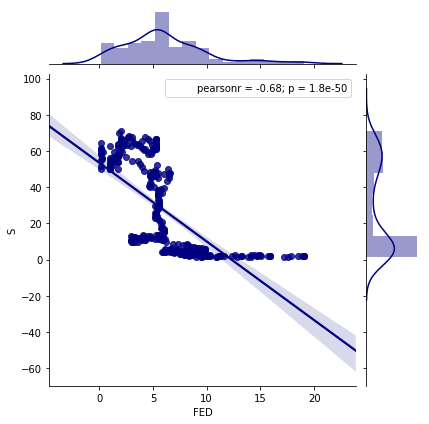

In [35]:
sns.jointplot(x="FED", y="S", data=stock, kind="reg",color="navy");

C:\Users\George\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\George\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


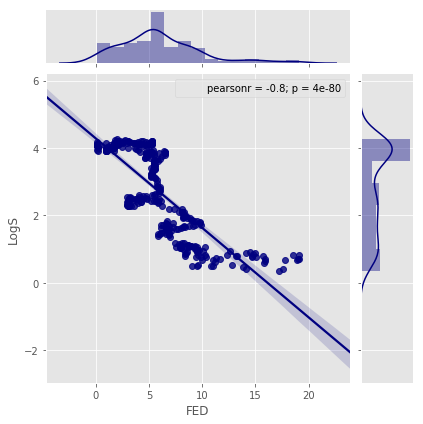

In [215]:
sns.jointplot(x="FED", y="LogS", data=stock, kind="reg",color="navy");

In [38]:
#Jarque-Bera normality test 0f the log-level
JB, JBpv,skw,kurt = sm.stats.stattools.jarque_bera(results6.resid)
print(JB,JBpv,skw,kurt)

(7.619800900784204, 0.022150383909317395, 0.2320281533850271, 2.4590393074669064)


C:\Users\George\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


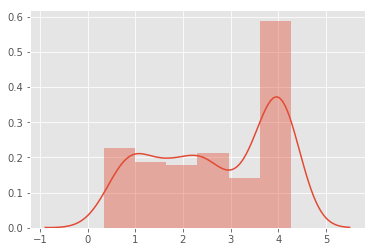

In [201]:
sns.distplot(LogS)

C:\Users\George\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


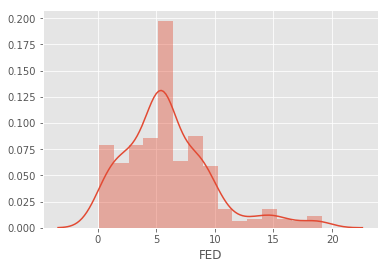

In [203]:
# Reasonably normal, but long in the RHS-tail
FED = stock.FED
sns.distplot(FED)

In [ ]:
### FOR REFERENCE ONLY, TO DELETE 

In [151]:
del_FED = stock["delta_fed"] ## X usually means our input variables (or independent variables)
S = stock["S"] ## Y usually means our output/dependent variable
del_FED = sm.add_constant(del_FED) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(S, del_FED).fit() ## sm.OLS(output, input)
predictions = model.predict(del_FED)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.007155
Date:                Thu, 08 Nov 2018   Prob (F-statistic):              0.933
Time:                        15:57:19   Log-Likelihood:                -1656.5
No. Observations:                 360   AIC:                             3317.
Df Residuals:                     358   BIC:                             3325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3472      1.276     21.428      0.000      24.837      29.857
delta_fed      0.1709      2.021      0.085      0.933      -3.803       4.145
==============================================================================
Omnibus:                        9.383   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               44.355
Skew:                           0.402   Prob(JB):                     2.34e-10
Kurtosis:                       1.480   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
FED = stock['FED']

ValueError: x and y must have same first dimension, but have shapes (360L,) and (10L,)

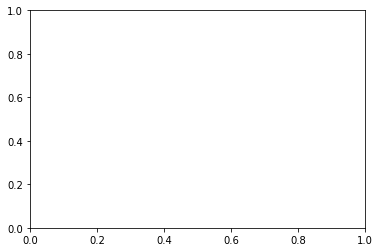

In [138]:
FED = stock['FED']
FED.sort_values()
plt.plot(FED, y, 'o') # 'r' is the color red
plt.xlabel('FED Rate')
plt.ylabel('Stock Price')
plt.title('Effect of Interest Rates on Stock Prices')
z = np.polyfit(FED, y, 1)
p = np.poly1d(z)
pylab.plot(lfed,p(FED),"r--")
plt.show()

Text(0.5,1,'Effect of Interest Rates on Stock Prices (Log-Level)')

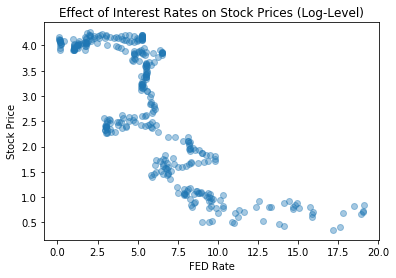

In [62]:
fed = stock['FED']
fed.sort_values()
ls = np.log(stock['S'])
lfed.sort_values()
plt.plot(fed,ls,'o',alpha=0.4)
plt.xlabel('FED Rate')
plt.ylabel('Stock Price')
plt.title('Effect of Interest Rates on Stock Prices (Log-Level)')

In [81]:
lfed = sm.add_constant(lfed) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(ls, lfed).fit() ## sm.OLS(output, input)
predictions = model.predict(lfed)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     278.1
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.29e-46
Time:                        11:27:30   Log-Likelihood:                -491.32
No. Observations:                 360   AIC:                             986.6
Df Residuals:                     358   BIC:                             994.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0533      0.096     42.232      0.000       3.865       4.242
FED           -0.9021      0.054    -16.678      0.000      -1.008      -0.796
==============================================================================
Omnibus:                      197.634   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.320
Skew:                           0.129   Prob(JB):                     1.42e-05
Kurtosis:                       1.808   Cond. No.                         4.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([0.08195762, 0.06439527, 0.15367053, 0.07756703, 0.0863482 ,
        0.02341646, 0.00878117, 0.01317176, 0.00731764, 0.0102447 ]),
 array([ 0.12 ,  2.018,  3.916,  5.814,  7.712,  9.61 , 11.508, 13.406,
        15.304, 17.202, 19.1  ]),
 <a list of 10 Patch objects>)

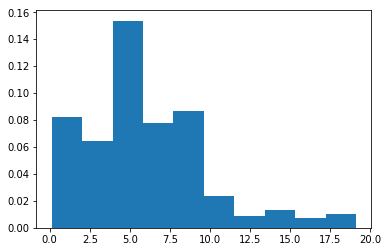

In [97]:
plt.hist(FED,bins=None,density=True) 

In [139]:
%matplotlib inline

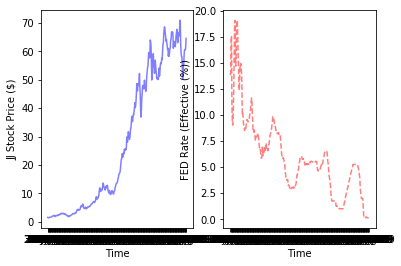

In [108]:
date_1 = stock['Date']
stock_price = stock['S']
fed_rate = stock['FED']
stock_price.head()
#plt.subplot(1,2,1)
plt.plot(date_1,stock_price,'b',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('JJ Stock Price ($)')
#plt.subplot(1,2,2)
plt.plot(date_1,fed_rate,'r--',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('FED Rate (Effective (%))')

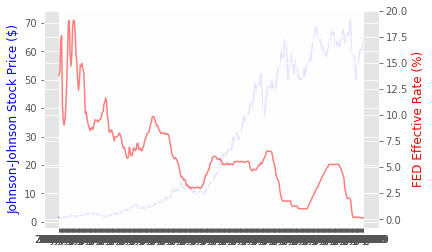

In [144]:
stock_df = stock[['Date','S']]
fed_df = stock[['Date','FED']]
stock_df.set_index('Date',inplace=True)
fed_df.set_index('Date',inplace=True)

fig1 = plt.figure()
 
ax1 = fig1.add_subplot(111)
line1 = ax1.plot(stock_df, 'b',alpha=0.5)
plt.ylabel("Johnson-Johnson Stock Price ($)",color="b")

ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
line2 = ax2.plot(fed_df, 'r',alpha=0.5)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.ylabel("FED Effective Rate (%)",color="r")
 
# myFmt = mdates.DateFormatter('%b %d')

# ax1.xaxis.set_major_formatter(myFmt)
# ax1.xaxis_date()
plt.show()


In [234]:
stock.set_index('Date',inplace=True)
stock.head()

,S,nom_return,real_return,log_return,FED,delta_fed,IP,LogS
Date,,,,,,,,
31-Jan-80,1.61,0.00,0.00,0.00,13.82,0.00,51.7,0.476234
29-Feb-80,1.52,-0.06,-0.06,-0.03,14.13,0.31,51.5,0.418710
31-Mar-80,1.42,-0.06,-0.06,-0.03,17.19,3.06,50.5,0.350657
30-Apr-80,1.51,0.06,0.06,0.03,17.61,0.42,49.2,0.412110
30-May-80,1.63,0.08,0.08,0.03,10.98,-6.63,48.6,0.488580


In [ ]:
### ESTIMATE THE DIFFERENCE BETWEEN THE MODELS PRE AND DURING THE CRISIS ###

In [262]:
stock_pre = stock[:'28-Sep-07']
stock_pre.head()

,S,nom_return,real_return,log_return,FED,delta_fed,IP,LogS
Date,,,,,,,,
31-Jan-80,1.61,0.00,0.00,0.00,13.82,0.00,51.7,0.476234
29-Feb-80,1.52,-0.06,-0.06,-0.03,14.13,0.31,51.5,0.418710
31-Mar-80,1.42,-0.06,-0.06,-0.03,17.19,3.06,50.5,0.350657
30-Apr-80,1.51,0.06,0.06,0.03,17.61,0.42,49.2,0.412110
30-May-80,1.63,0.08,0.08,0.03,10.98,-6.63,48.6,0.488580


In [265]:
stock_dur = stock['31-Oct-07':'31-Mar-09']
stock_dur.head()

,S,nom_return,real_return,log_return,FED,delta_fed,IP,LogS
Date,,,,,,,,
31-Oct-07,65.30,0.03,0.03,0.01,4.76,-0.18,100.4,4.178992
30-Nov-07,66.48,0.02,0.02,0.01,4.49,-0.27,100.5,4.196901
31-Dec-07,67.66,0.02,0.02,0.01,4.24,-0.25,100.1,4.214495
31-Jan-08,65.73,-0.03,-0.03,-0.01,3.94,-0.30,99.9,4.185555
29-Feb-08,62.99,-0.04,-0.04,-0.02,2.98,-0.96,99.6,4.142976


In [268]:
# REGRESSION MODEL PRE-CRISIS
# All values significant ***, high/medium R^2, good F-statistic
# Coefficient fits with economic intuition
# Fit regression model (using the natural log of one of the regressors)

results4 = smf.ols('np.log(S) ~ FED ', data=stock_pre).fit()

# Inspect the results
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(S)   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     507.2
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           9.32e-69
Time:                        09:34:47   Log-Likelihood:                -390.01
No. Observations:                 333   AIC:                             784.0
Df Residuals:                     331   BIC:                             791.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2569      0.086     49.344      0.0

In [267]:
# REGRESSION MODEL DURING-CRISIS (N.B. VERY SMALL SAMPLE SIZE, ARE ANY OLS ASSUMPTIONS VIOLATED???)
# All values significant at **, medium R^2 
# Sign on the coefficient does not fit with economic intuition 
# Fit regression model (using the natural log of one of the regressors)
results5 = smf.ols('np.log(S) ~ FED', data=stock_dur).fit()

# Inspect the results
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:              np.log(S)   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     11.70
Date:                Fri, 09 Nov 2018   Prob (F-statistic):            0.00350
Time:                        09:34:41   Log-Likelihood:                 23.925
No. Observations:                  18   AIC:                            -43.85
Df Residuals:                      16   BIC:                            -42.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0722      0.027    149.933      0.0

C:\Users\George\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
